# PostNauka. Recipe

Here goes an example of using the Baseline recipe which helps to build a generally good topic model.

* Recipes in TopicNet: [recipes](https://github.com/machine-intelligence-laboratory/TopicNet/tree/master/topicnet/cooking_machine/recipes)

# Contents<a id="contents"></a>

* [Loading data](#data)
* [Formatting the recipe](#formatting)
* [Experiment](#experiment)
* [Best Model](#best-model)
    * [Score plots](#plots)
    * [Viewers (for more detailed exploration)](#viewers)

In [1]:
import numpy as np
import os
import shutil
import tempfile

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm

In [3]:
from IPython.display import display_html

In [6]:
from topicnet.dataset_manager import load_dataset
from topicnet.cooking_machine.config_parser import build_experiment_environment_from_yaml_config
from topicnet.cooking_machine.dataset import get_modality_vw
from topicnet.cooking_machine.model_tracking import START
from topicnet.cooking_machine.pretty_output import make_notebook_pretty
from topicnet.cooking_machine.recipes import BaselineRecipe
from topicnet.viewers import (
    TopDocumentsViewer,
    TopTokensViewer
)

In [7]:
make_notebook_pretty()

## Loading data<a id="data"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div

Let's download some dataset from those [available in TopicNet](https://github.com/machine-intelligence-laboratory/TopicNet/tree/master/topicnet/dataset_manager).

In [8]:
DATASET_NAME = 'postnauka'

In [9]:
DATASET = load_dataset(DATASET_NAME)

In [10]:
DATASET._data.head()

,id,vw_text,raw_text
id,,,
1.txt,1.txt,1.txt |@author fuchs preobrazhensky tabachniko...,@title Автограф # «Математический дивертисмент...
2.txt,2.txt,2.txt |@word книга:2 лекция:3 рассматриваться:...,@title Главы: Маскулинности в российском конте...
3.txt,3.txt,3.txt |@word развитие появляться пиджина:4 бел...,@title Пиджины и креольские языки | @snippet Л...
4.txt,4.txt,4.txt |@word стандартный задача:3 состоять:4 р...,@title FAQ: Физиология микроводорослей | @snip...
5.txt,5.txt,5.txt |@2gramm повседневный_практика государст...,@title Русская государственная идеология | @sn...


In [11]:
DATASET_PATH = DATASET._data_path

In [12]:
DATASET_PATH

'/home/alekseev/topicnet/dataset_manager/postnauka.csv'

## Formatting the recipe<a id="formatting"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

Below we load a recipe, which is a carcass for model training pipeline, and format it.

In [13]:
training_pipeline = BaselineRecipe()

training_pipeline.format_recipe(
    modality_list           = ['@word'],     # first modality is the main one
    dataset_path            = DATASET_PATH,
    topic_number            = 15,
    background_topic_number = 1,
)

print(training_pipeline._recipe)


# This config follows a strategy described by Murat Apishev
# one of the core programmers of BigARTM library in personal correspondence.
# According to his letter 'decent' topic model can be obtained by
# Decorrelating model topics simultaneously looking at retrieved TopTokens


# Use .format(modality_list=modality_list, main_modality=main_modality, dataset_path=dataset_path,
# specific_topics=specific_topics, background_topics=background_topics)
# when loading the recipe to adjust for your dataset

topics:
# Describes number of model topics, better left to the user to define optimal topic number
    specific_topics: ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14']
    background_topics: ['bcg_15']

# Here is example of model with one modality
regularizers:
    - DecorrelatorPhiRegularizer:
        name: decorrelation_phi
        topic_names: specific_topics
      

## Experiment<a id="experiment"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

Experiment folder should be unique:

In [14]:
EXPERIMENT_PATH = tempfile.mkdtemp()

In [15]:
EXPERIMENT_PATH

'/tmp/tmpsm9nonbl'

In [16]:
experiment, dataset = training_pipeline.build_experiment_environment(
    save_path=EXPERIMENT_PATH,
    experiment_id=f'{DATASET_NAME}_Baseline',
)

Running the experiment pipeline!

In [17]:
%%time

experiment.run(dataset, verbose=True, nb_verbose=True)

Experiment postnauka_Baseline

Experiment was made with BigARTM 0.9.2
Tree:
                            ┌--23h18m39s_22d04m2020y---
                            ├--23h19m13s_22d04m2020y---
                            ├--23h19m51s_22d04m2020y---
                            ├--23h20m31s_22d04m2020y---
                            ├--23h21m11s_22d04m2020y---
                            ├--23h21m55s_22d04m2020y---
                            ├--23h22m44s_22d04m2020y---
                            ├--23h23m32s_22d04m2020y---
-----------root-----------──┤
                            ├--23h24m23s_22d04m2020y---
                            ├--23h25m21s_22d04m2020y---
                            ├--23h26m24s_22d04m2020y---
                            ├--23h27m41s_22d04m2020y---
                            ├--23h29m10s_22d04m2020y---
                            ├--23h30m59s_22d04m2020y---
                            ├--23h33m14s_22d04m2020y---
                            ├--23h36m27s_22d04m2020y--

CPU times: user 1min 47s, sys: 2min 32s, total: 4min 19s
Wall time: 29min 50s


{Model(id=--23h36m27s_22d04m2020y---, parent_id=-----------root-----------, experiment_id=postnauka_Baseline)}

What models and stages we have:

In [18]:
experiment.show()

Experiment postnauka_Baseline

Experiment was made with BigARTM 0.9.2
Tree:
                            ┌--23h18m39s_22d04m2020y---
                            ├--23h19m13s_22d04m2020y---
                            ├--23h19m51s_22d04m2020y---
                            ├--23h20m31s_22d04m2020y---
                            ├--23h21m11s_22d04m2020y---
                            ├--23h21m55s_22d04m2020y---
                            ├--23h22m44s_22d04m2020y---
                            ├--23h23m32s_22d04m2020y---
-----------root-----------──┤
                            ├--23h24m23s_22d04m2020y---
                            ├--23h25m21s_22d04m2020y---
                            ├--23h26m24s_22d04m2020y---
                            ├--23h27m41s_22d04m2020y---
                            ├--23h29m10s_22d04m2020y---
                            ├--23h30m59s_22d04m2020y---
                            ├--23h33m14s_22d04m2020y---
                            ├--23h36m27s_22d04m2020y--

## Best Model<a id="best-model"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

Let's select a model which is the best on the last stage:

In [19]:
BEST_MODEL = experiment.select(experiment.criteria[-1][0])[0]

In [20]:
BEST_MODEL.describe_regularizers()

tau  gamma class_ids
model_id                   regularizer_name                             
--23h36m27s_22d04m2020y--- decorrelation_phi   0.140000    0.0   [@word]
                           smooth_phi_bcg      8.303091    NaN        []
                           smooth_theta_bcg   46.798799    NaN      None

In [21]:
BEST_MODEL.describe_scores()

last_value
model_id                   score_name                                   
--23h36m27s_22d04m2020y--- PerplexityScore@all                   3578.62
                           SparsityThetaScore                  0.0311949
                           SparsityPhiScore@word                0.498371
                           PerplexityScore@word                  3578.62
                           TopicKernel@word.average_coherence          0
                           TopicKernel@word.average_contrast     0.53735
                           TopicKernel@word.average_purity      0.550918
                           TopicKernel@word.average_size         1422.94
                           BleiLaffertyScore                    0.428945

### Score plots<a id="plots"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

If we want to make plots, we need to restore all score values for trained models first

In [22]:
%%time

MODEL_SCORES = dict()

for model_id, model in experiment.models.items():
    if model_id == START:
        continue
    
    model = model.restore()
    MODEL_SCORES[model_id] = model.scores

CPU times: user 1min 3s, sys: 16.6 s, total: 1min 20s
Wall time: 56 s


In [23]:
MODEL_COLORS = np.linspace(0, 0.65, len(MODEL_SCORES))
ITERATION_LABEL = 'Iteration'

Solid line represent the best model we have selected; dashed lines are the rest. 

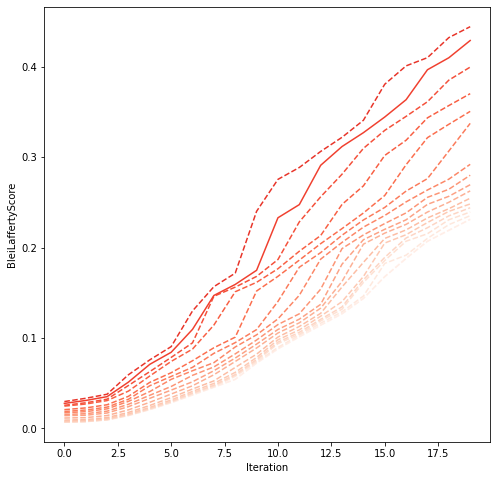

In [25]:
plt.figure(figsize=(8,8))

score_name = 'BleiLaffertyScore'

for i, (tm_id, tm_scores) in enumerate(MODEL_SCORES.items()):
    score = tm_scores[score_name]
    ls = '-' if tm_id == BEST_MODEL.model_id else '--'

    plt.plot(score, color=cm.Reds(MODEL_COLORS[i]), ls=ls)

plt.ylabel(score_name)
plt.xlabel(ITERATION_LABEL)

plt.show()

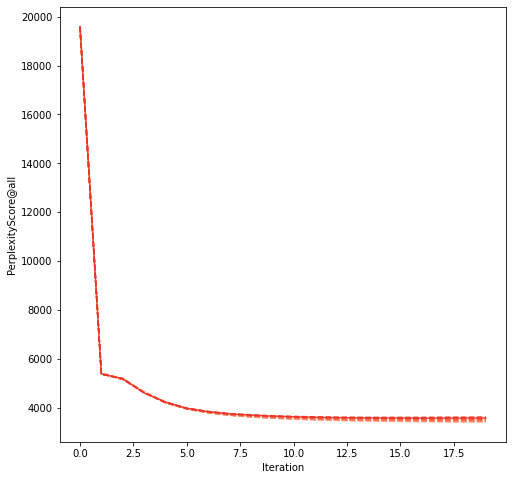

In [26]:
plt.figure(figsize=(8,8))

score_name = 'PerplexityScore@all'

for i, (tm_id, tm_scores) in enumerate(MODEL_SCORES.items()):
    score = tm_scores[score_name]
    ls = '-' if tm_id == BEST_MODEL.model_id else '--'

    plt.plot(score, color=cm.Reds(MODEL_COLORS[i]), ls=ls)

plt.ylabel(score_name)
plt.xlabel(ITERATION_LABEL)

plt.show()

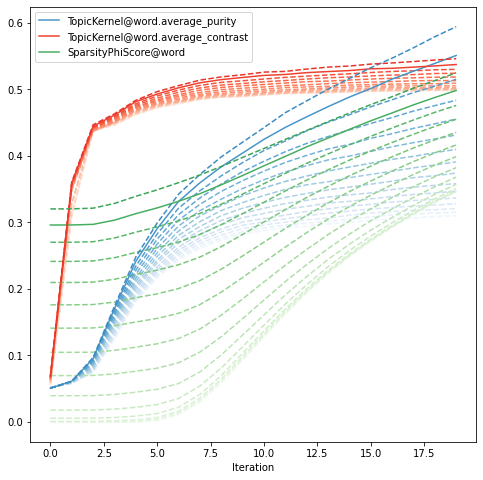

In [27]:
plt.figure(figsize=(8,8))

for i, (tm_id, tm_scores) in enumerate(MODEL_SCORES.items()):
    ls = '-' if tm_id == BEST_MODEL.model_id else '--'

    for score_name, color_map in zip([
                'TopicKernel@word.average_purity',
                'TopicKernel@word.average_contrast',
                'SparsityPhiScore@word',
            ], [cm.Blues, cm.Reds, cm.Greens]):
        
        score = tm_scores[score_name]
        label = score_name if tm_id == BEST_MODEL.model_id else None
        plt.plot(score, color=color_map(MODEL_COLORS[i]), ls=ls, label=label)


plt.xlabel(ITERATION_LABEL)
plt.legend()

plt.show()

### Viewers (for more detailed exploration)<a id="viewers"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

Applying viewers to examin the model:

In [28]:
top_tok_viewer = TopTokensViewer(
    BEST_MODEL, num_top_tokens=10, method='phi'
)
top_doc_viewer = TopDocumentsViewer(
    BEST_MODEL, dataset=dataset
)

In [29]:
top_tokens_view = top_tok_viewer.view_from_jupyter(
    display_output=False,
    give_html=True,
)

In [30]:
display_html(' '.join(top_tokens_view), raw=True)

topic_0 modality token 
 
 @word 
 наука 
 0.026400 
 
 
 учёный 
 0.015640 
 
 
 заниматься 
 0.013470 
 
 
 университет 
 0.013080 
 
 
 хороший 
 0.012870 
 
 
 школа 
 0.011010 
 
 
 работать 
 0.010380 
 
 
 должный 
 0.009560 
 
 
 работа 
 0.009040 
 
 
 студент 
 0.008840 
 
 topic_1 modality token 
 
 @word 
 культура 
 0.026360 
 
 
 фильм 
 0.023280 
 
 
 искусство 
 0.016660 
 
 
 музей 
 0.011150 
 
 
 кино 
 0.008840 
 
 
 театр 
 0.007470 
 
 
 герой 
 0.007350 
 
 
 зритель 
 0.006450 
 
 
 художник 
 0.005180 
 
 
 ритуал 
 0.004940 
 
 topic_2 modality token 
 
 @word 
 клетка 
 0.040750 
 
 
 организм 
 0.020140 
 
 
 молекула 
 0.014260 
 
 
 днк 
 0.014130 
 
 
 ген 
 0.013790 
 
 
 белка 
 0.012370 
 
 
 пациент 
 0.011920 
 
 
 бактерия 
 0.011210 
 
 
 болезнь 
 0.009870 
 
 
 белок 
 0.009800 
 
 topic_3 modality token 
 
 @word 
 книга 
 0.074860 
 
 
 текст 
 0.037270 
 
 
 автор 
 0.027540 
 
 
 писать 
 0.025950 
 
 
 русский 
 0.023880 
 
 
 написать 
 0.019890 
 
 
 литература 
 0.016550 
 
 
 читать 
 0.012560 
 
 
 письмо 
 0.012520 
 
 
 читатель 
 0.011770 
 
 topic_4 modality token 
 
 @word 
 право 
 0.058400 
 
 
 история 
 0.050590 
 
 
 историк 
 0.029570 
 
 
 закон 
 0.019910 
 
 
 сталин 
 0.019080 
 
 
 прошлое 
 0.018470 
 
 
 документ 
 0.014390 
 
 
 суд 
 0.012530 
 
 
 правовой 
 0.009040 
 
 
 юрист 
 0.008030 
 
 topic_5 modality token 
 
 @word 
 звезда 
 0.025610 
 
 
 вселенная 
 0.022880 
 
 
 земля 
 0.021230 
 
 
 галактика 
 0.018430 
 
 
 планета 
 0.015570 
 
 
 солнце 
 0.013930 
 
 
 атмосфера 
 0.008270 
 
 
 наблюдение 
 0.007610 
 
 
 планет 
 0.007230 
 
 
 объект 
 0.006780 
 
 topic_6 modality token 
 
 @word 
 язык 
 0.063100 
 
 
 слово 
 0.039990 
 
 
 мозг 
 0.022450 
 
 
 память 
 0.011760 
 
 
 нейрон 
 0.009150 
 
 
 словарь 
 0.007460 
 
 
 звук 
 0.007410 
 
 
 буква 
 0.007390 
 
 
 речь 
 0.007370 
 
 
 лингвист 
 0.006480 
 
 topic_7 modality token 
 
 @word 
 церковь 
 0.042440 
 
 
 христианский 
 0.028700 
 
 
 христианство 
 0.025110 
 
 
 мода 
 0.022720 
 
 
 кавказ 
 0.018630 
 
 
 рим 
 0.017760 
 
 
 арабский 
 0.016420 
 
 
 церковный 
 0.015670 
 
 
 араб 
 0.011460 
 
 
 ледник 
 0.010620 
 
 topic_8 modality token 
 
 @word 
 животное 
 0.017790 
 
 
 ребёнок 
 0.014990 
 
 
 вид 
 0.013500 
 
 
 женщина 
 0.011320 
 
 
 растение 
 0.010210 
 
 
 эволюция 
 0.008820 
 
 
 поведение 
 0.008200 
 
 
 самец 
 0.007270 
 
 
 мужчина 
 0.006920 
 
 
 птица 
 0.006910 
 
 topic_9 modality token 
 
 @word 
 государство 
 0.019600 
 
 
 власть 
 0.016080 
 
 
 общество 
 0.013530 
 
 
 россия 
 0.013450 
 
 
 политический 
 0.013410 
 
 
 война 
 0.012100 
 
 
 страна 
 0.011980 
 
 
 политика 
 0.008620 
 
 
 германия 
 0.006610 
 
 
 свобода 
 0.006460 
 
 topic_10 modality token 
 
 @word 
 частица 
 0.021730 
 
 
 энергия 
 0.015230 
 
 
 электрон 
 0.011140 
 
 
 атом 
 0.011020 
 
 
 кварк 
 0.009840 
 
 
 свет 
 0.008110 
 
 
 эксперимент 
 0.007900 
 
 
 фотон 
 0.007820 
 
 
 свойство 
 0.007350 
 
 
 физика 
 0.007340 
 
 topic_11 modality token 
 
 @word 
 понятие 
 0.010040 
 
 
 являться 
 0.008840 
 
 
 отношение 
 0.008540 
 
 
 философия 
 0.007570 
 
 
 представление 
 0.006510 
 
 
 социология 
 0.006510 
 
 
 социальный 
 0.006250 
 
 
 теория 
 0.006130 
 
 
 действие 
 0.005670 
 
 
 смысл 
 0.005650 
 
 topic_12 modality token 
 
 @word 
 бог 
 0.010860 
 
 
 территория 
 0.009370 
 
 
 имя 
 0.009140 
 
 
 остров 
 0.008110 
 
 
 царь 
 0.007170 
 
 
 народ 
 0.006880 
 
 
 миф 
 0.006380 
 
 
 восток 
 0.005110 
 
 
 сын 
 0.004790 
 
 
 правитель 
 0.004740 
 
 topic_13 modality token 
 
 @word 
 город 
 0.037380 
 
 
 технология 
 0.022250 
 
 
 компьютер 
 0.017640 
 
 
 сеть 
 0.017110 
 
 
 пространство 
 0.014880 
 
 
 задача 
 0.010660 
 
 
 устройство 
 0.009920 
 
 
 машина 
 0.009150 
 
 
 робот 
 0.009120 
 
 
 использовать 
 0.008500 
 
 topic_14 modality token 
 
 @word 
 экономика 
 0.017840 
 
 
 компания

In [31]:
top_doc_viewer.view_from_jupyter(current_num_top_doc=5)

Topic name: topic_0 590.txt @title Прямая речь: Артём Оганов | @snippet Химик, профессор Университета штата Нью-Йорк о советском образовании, «наркотических городах» и перспективах работы в России
. 2522.txt @title Точка зрения # Проблема преподавания химии в школе | @snippet Мнения экспертов ПостНауки об основных проблемах преподавания химии в средней школе
. 2848.txt @title Прямая речь: Фуад Алескеров | @snippet Математик, руководитель Департамента математики факультета экономики ВШЭ о проблемах российского образования, предсказаниях биржи и качествах ученого
. 912.txt @title Точка зрения # Физика в школе | @snippet Мнения экспертов ПостНауки об основных проблемах преподавания физики в средней школе
. 2905.txt @title Точка зрения # Проблемы коммуникации ученых и СМИ | @snippet Мнения экспертов ПостНауки о том, с какими трудностями сталкиваются ученые при общении с представителями средств массовой информации
. Topic name: topic_1 884.txt @title Главы # Цирк в пространстве культуры | @snippet Отрывок из книги «Цирк в пространстве культуры» филолога и историка Ольги Бурениной-Петровой об особенностях советского цирка первой половины XX века
. 608.txt @title Особенности сценического костюма в России | @snippet Искусствовед Раиса Кирсанова о социальной критике театрального костюма, этике русских актрис и реформе театра
. 376.txt @title Оценка погружения в кинопросмотр | @snippet Социолог Дмитрий Рогозин о методике изучения зрительского погружения в просмотр фильма на примере «Добро пожаловать в Зомбиленд»
. 1739.txt @title Ян Левченко: «Поворот к Америке сыграл ключевую роль в революционном советском кинематографе» | @snippet Культуролог Ян Левченко об истории советского кинематографа: от царской хроники до комедий «оттепели» и перестроечного времени
. 2473.txt @title Штурмуя публичное пространство: слова о гетеротопии плохого вкуса | @snippet Философ Александр Павлов о теории кэмпа Сьюзен Сонтаг, русской традиции кинокритики и утопии хорошего вкуса
. Topic name: topic_2 330.txt @title Трансгенные животные и продление жизни | @snippet Биолог Алексей Москалев о генетике старения, регуляции метаболизма и геропротекторах
. 2111.txt @title ВИЧ-ассоциированное поражение миокарда и способы его защиты | @snippet Способен ли антиоксидант процистеин предотвращать развитие ВИЧ-индуцированной кардиомиопатии
. 1841.txt @title Инсульт: причины и симптомы | @snippet Что является причиной инсульта, какие симптомы помогут его распознать и какие способы лечения практикуются в современной медицине
. 917.txt @title FAQ: Избыток иммунитета | @snippet 5 фактов об инфекции, укреплении иммунитета и гамма-интерфероне
. 3031.txt @title FAQ: Гастрит как инфекционная болезнь | @snippet 5 фактов о причинах возникновения гастрита и язвы и современных способах их лечения
. Topic name: topic_3 2684.txt @title «Булгаков по природе своего дарования в первую очередь был сатириком совершенно исключительного класса» | @snippet Интервью с филологом Ильей Иткиным о лингвистических особенностях романа «Мастер и Маргарита», языковой игре и говорящих фамилиях
. 1407.txt @title Снорри Стурлусон | @snippet Филолог Фёдор Успенский о политической карьере, творчестве и трагической гибели автора «Младшей Эдды», одного из самых влиятельных людей средневековой Скандинавии
. 1677.txt @title Повседневный быт московских цензоров | @snippet Филолог Алина Бодрова об авторах, издателях и цензорах журнала «Москвитянин»
. 2839.txt @title «Хотя мы не всегда понимаем все слова и исторический контекст, это не мешает нам сопереживать Татьяне или Онегину» | @snippet Интервью с филологом Алиной Бодровой о создании национального литературного языка, непонятных словах в «Онегине» и школьной программе
. Topic name: topic_4 1862.txt @title Кондикция владения | @snippet Юрист Денис Новак о защите при неправомерном лишении владения, виндикационном и кондикционном исках и ценности владения имуществом
. 2390.txt @title Главы # Король не умирает никогда | @snippet Отрывок из книги «Два тела короля. И

There are several interesting things to note:

* The topics are sparse. The Theta matrix for `topic_7` is empty. That isn't something one is likely to see when working with LDA (which tends to make topics smooth)
* The last topic is `bcg_15`: this is a backgraound topic. The top-tokens of this topic are very common and not very informative words: "say", "big", "exist", "happen", "become"... The top documents of this topic do not fit together. This is expected: the background topic is a place for tokens and documents not belonging elsewhere.